## Univariate Nonlinear Transformations

We just saw that adding squared or cubed features can help linear models for regression. There are other transformations that often prove useful for transforming certain features: in particular, applying mathematical functions like log, exp, or sin. While tree-based models only care about the ordering of the features, linear models and neural networks are very tied to the scale and distribution of each feature, and if there is a nonlinear relation between the feature and the target, that becomes hard to model—particularly in regression. The functions *log* and *exp* can help by adjusting the relative scales in the data so that they can be captured better by a linear model or neural network. We saw an application of that in Chapter 2 with the memory price data. The *sin* and *cos* functions can come in handy when dealing with data that encodes periodic patterns.

Most models work best when each feature (and in regression also the target) is loosely Gaussian distributed—that is, a histogram of each feature should have something resembling the familiar “bell curve” shape. Using transformations like *log* and *exp* is a hacky but simple and efficient way to achieve this. A particularly common case when such a transformation can be helpful is when dealing with integer count data. By count data, we mean features like “how often did user A log in?” Counts are never negative, and often follow particular statistical patterns. We are using a synthetic dataset of counts here that has properties similar to those you can find in the wild. The features are all integer-valued, while the response is continuous:

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn
from IPython.display import display
import mglearn

# Don't display deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Let’s look at the first 10 entries of the first feature. All are integer values and positive, but apart from that it’s hard to make out a particular pattern.

If we count the appearance of each value, the distribution of values becomes clearer:

In [4]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


The value 2 seems to be the most common, with 68 appearances (bincount always starts at 0), and the counts for higher values fall quickly. However, there are some very high values, like 84 and 85, that are appearing twice. We visualize the counts:

Text(0.5, 0, 'Value')

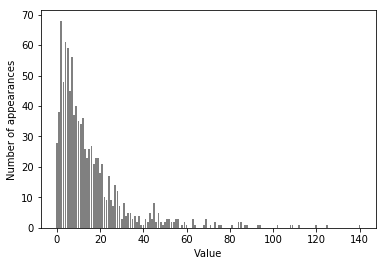

In [5]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

Features X[:, 1] and X[:, 2] have similar properties. This kind of distribution of values (many small ones and a few very large ones) is very common in practice.  However, it is something most linear models can’t handle very well. Let’s try to fit a ridge regression to this model:

In [6]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

NameError: name 'train_test_split' is not defined